# Subject: Classical Data Analysis

## Session 1 - Regression

### Individual assignment 1

Develop a regression analysis in Statmodels (with and without a constant) and SKLearn, based on the Iris sklearn dataset. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length.

See here for more information on this dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set 

Use the field “sepal width (cm)” as independent variable and the field “sepal length (cm)” as dependent variable.

- Interpret and discuss the OLS Regression Results.
- Commit scripts in your GitHub account. You should export your solution code (.ipynb notebook) and push it to your repository “ClassicalDataAnalysis”.

The following are the tasks that should complete and synchronize with your repository “ClassicalDataAnalysis” until October 13. Please notice that none of these tasks is graded, however it’s important that you correctly understand and complete them in order to be sure that you won’t have problems with further assignments.

# Linear Regression in Statsmodels

## Load the iris dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris_y = iris.data[:, np.newaxis, 0]

In [4]:
iris_X = iris.data[:, np.newaxis, 1]

### Regression model with Statsmodels and without a constant:¶

In [5]:
regr = linear_model.LinearRegression(fit_intercept=False, normalize=False, copy_X=True, n_jobs=1)
regr.fit(iris_X, iris_y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [6]:
iris_y_pred = regr.predict(iris_X)
print('Coefficients: \n', regr.coef_
     )
print("Mean squared error: %.2f"
      % mean_squared_error(iris_y, iris_y_pred))
print('Variance score: %.2f' % r2_score(iris_y, iris_y_pred))

Coefficients: 
 [[ 1.87167934]]
Mean squared error: 1.50
Variance score: -1.20


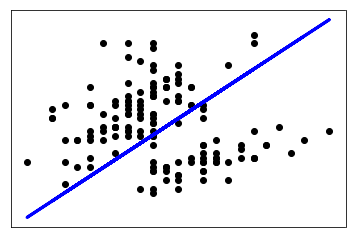

In [7]:
plt.scatter(iris_X, iris_y,  color='black')
plt.plot(iris_X, iris_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

/Users/roman2006/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [15]:
x=df['sepal width (cm)']
y= df['sepal length (cm)']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     3316.
Date:                Mon, 16 Oct 2017   Prob (F-statistic):          1.04e-103
Time:                        00:00:16   Log-Likelihood:                -243.13
No. Observations:                 150   AIC:                             488.3
Df Residuals:                     149   BIC:                             491.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sepal width (cm)     1.8717      0.033     57.585      0.000       1.807       1.936
==============================================================================
Omnibus:                       16.884   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.669
Skew:                          -0.336   Prob(JB):                       0.0216
Kurtosis:                       2.120   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the Table 

Comparing both methods we can see that actually the r-squared is pretty high, still seeing the graph I wpould beleive it to be a bad model, it is quite a surprise that it is actually good.

### Regression model with Statsmodels and with a constant:

In [16]:
regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
regr.fit(iris_X, iris_y)
iris_y_pred = regr.predict(iris_X)
print('Coefficients: \n', regr.coef_
     )
print("Mean squared error: %.2f"
      % mean_squared_error(iris_y, iris_y_pred))
print('Variance score: %.2f' % r2_score(iris_y, iris_y_pred))

Coefficients: 
 [[-0.20887029]]
Mean squared error: 0.67
Variance score: 0.01


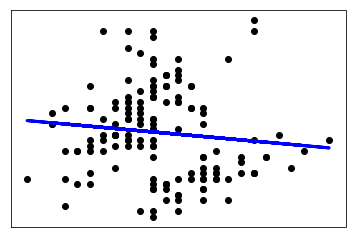

In [17]:
plt.scatter(iris_X, iris_y,  color='black')
plt.plot(iris_X, iris_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
x= df['sepal width (cm)']
y= df['sepal length (cm)']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.792
Date:                Mon, 16 Oct 2017   Prob (F-statistic):              0.183
Time:                        00:06:45   Log-Likelihood:                -183.14
No. Observations:                 150   AIC:                             370.3
Df Residuals:                     148   BIC:                             376.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.4812      0.481     13.466      0.000       5.530       7.432
sepal width (cm)    -0.2089      0.156     -1.339      0.183      -0.517       0.099
==============================================================================
Omnibus:                        4.455   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.252
Skew:                           0.356   Prob(JB):                        0.119
Kurtosis:                       2.585   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the Table 

It is a bad model, we can see that even though the mean squarred error is 0.67 the variance score is way to low so the points vary way too much, when done with statsmodel though, the R-squared is much lower, making it a completely unrelated model.

# Linear Regression in SKLearn 

In [29]:
x= pd.DataFrame(df, columns=['sepal width (cm)'])
y= pd.DataFrame(df, columns=['sepal length (cm)'])
lm = linear_model.LinearRegression()
model = lm.fit(x,y)
lm.score(x,y) 


0.011961632834767699

In [30]:
lm.coef_

array([[-0.20887029]])

In [31]:
lm.intercept_ 

array([ 6.48122321])